In [ ]:
# Kind of Global correlation

In [73]:
import numpy as np
import matplotlib.pyplot as plt

globalGBC = np.load('/home/or/kpe_conn/ShenParc/totalGBC_1stTrauma.npy')

In [74]:
# load clinical data
import pandas as pd
allDat = pd.read_csv('/home/or/Documents/kpe_analyses/KPEIHR0009_DATA_2019-10-07_1121.csv')

pclDat = allDat.filter(like='pcl5')
# remove two irrelevant vars
del pclDat['pcl5_complete']
del pclDat['pcl5_total']
# sum all pcl scores
a = pclDat.sum(axis = 1, skipna = True) 
# add a to df
pclDat.insert(20, "pcl_total", a)
pclDat.insert(0, "scr_id", allDat['scr_id'])
pclDat.insert(1, "redcap_event_name", allDat["redcap_event_name"])
pclDat.head()

,scr_id,redcap_event_name,pcl5_1,pcl5_2,pcl5_3,pcl5_4,pcl5_5,pcl5_6,pcl5_7,pcl5_8,...,pcl5_12,pcl5_13,pcl5_14,pcl5_15,pcl5_16,pcl5_17,pcl5_18,pcl5_19,pcl5_20,pcl_total
0,CB1554,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,CB1554,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,CB1554,screening_selfrepo_arm_1,3.0,3.0,2.0,2.0,1.0,1.0,4.0,2.0,...,3.0,3.0,2.0,2.0,0.0,1.0,4.0,2.0,4.0,51.0
3,CB1562,screening_clinicia_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,CB1562,screening_raadmini_arm_1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [75]:
# subset to only relevant redcap event names
pclDat.redcap_event_name[0:30]
newPclDat = pclDat[((pclDat['redcap_event_name'] == 'screening_selfrepo_arm_1') | (pclDat['redcap_event_name'] == 'visit_1_arm_1') | (pclDat['redcap_event_name'] == 'visit_2_infusion_s_arm_1') | (pclDat['redcap_event_name'] == 'visit_7_week_follo_arm_1') | (pclDat['redcap_event_name'] == '30_day_follow_up_s_arm_1') | (pclDat['redcap_event_name'] == '90_day_follow_up_s_arm_1'))]
#a = pclDat.query(redcap_event_name = 'screening_selfrepo_arm_1', 'visit_1_arm_1', 'visit_2_infusion_s_arm_1', 'visit_7_week_follo_arm_1', '30_day_follow_up_s_arm_1', '90_day_follow_up_s_arm_1')

In [76]:
# now we need to move it from long to wide
widePclDat = newPclDat.pivot(index='scr_id', columns='redcap_event_name', values='pcl_total')
widePclDat

# remove all NAs in visit7
PclDat_nonNa = widePclDat.dropna(subset=['visit_7_week_follo_arm_1'])
PclDat_nonNa

# lastly - calculate difference in symptoms (pcl scores)
diff_scr_30 = PclDat_nonNa['30_day_follow_up_s_arm_1'] - PclDat_nonNa['screening_selfrepo_arm_1']
diff_scr_90 = PclDat_nonNa['90_day_follow_up_s_arm_1'] - PclDat_nonNa['screening_selfrepo_arm_1']
diff_visit1_30 = PclDat_nonNa['30_day_follow_up_s_arm_1'] - PclDat_nonNa['visit_1_arm_1']
# add to dataFrame
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_scr_30", diff_scr_30)
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_scr_90", diff_scr_90)
PclDat_nonNa.insert(len(PclDat_nonNa.columns), "diff_visit1_30", diff_visit1_30)

In [16]:
PclDat_nonNa

redcap_event_name,30_day_follow_up_s_arm_1,90_day_follow_up_s_arm_1,screening_selfrepo_arm_1,visit_1_arm_1,visit_2_infusion_s_arm_1,visit_7_week_follo_arm_1,diff_scr_30,diff_scr_90,diff_visit1_30
scr_id,,,,,,,,,
KPE008,56.0,49.0,51.0,58.0,0.0,61.0,5.0,-2.0,-2.0
KPE1223,42.0,49.0,39.0,41.0,0.0,50.0,3.0,10.0,1.0
KPE1253,33.0,NaN,58.0,63.0,0.0,58.0,-25.0,NaN,-30.0
KPE1263,37.0,34.0,21.0,54.0,0.0,56.0,16.0,13.0,-17.0
KPE1293,8.0,3.0,33.0,36.0,0.0,6.0,-25.0,-30.0,-28.0
KPE1307,45.0,20.0,56.0,49.0,0.0,41.0,-11.0,-36.0,-4.0
KPE1315,NaN,NaN,40.0,38.0,0.0,8.0,NaN,NaN,NaN
KPE1322,38.0,27.0,45.0,56.0,0.0,22.0,-7.0,-18.0,-18.0
KPE1339,46.0,67.0,68.0,0.0,0.0,65.0,-22.0,-1.0,46.0


In [77]:
globalGBC

array([[ 0.18103543,  0.09552986,  0.19747906, ..., -0.1708782 ,
         0.10638554,  0.0416217 ],
       [ 0.1798399 ,  0.13829806,  0.16429669, ..., -0.03974013,
         0.10074972,  0.12217436],
       [ 0.17518563,  0.08602487,  0.22682826, ..., -0.14415806,
         0.13173683,  0.20540341],
       ...,
       [ 0.03587883,  0.10720336,  0.03924779, ...,  0.06862347,
         0.14482264,  0.05781863],
       [-0.03214997,  0.04992601,  0.12421037, ...,  0.07960951,
         0.17616383,  0.20629587],
       [ 0.24162087,  0.12636792,  0.16238303, ...,  0.0645875 ,
         0.11888535,  0.15191166]])

In [78]:
mask = ~np.isnan(PclDat_nonNa['diff_visit1_30'])

In [79]:
corArr = []
for i in range(0,globalGBC.shape[1]):
    corMat = scipy.stats.pearsonr(globalGBC[:,i][mask], PclDat_nonNa['diff_visit1_30'][mask])
    corArr.append(corMat)
corArr = np.array(corArr)

In [80]:
corArr[corArr[:,1] > 0.05] = 0 # zero everything that is higher than p=0.05

array([[ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,  0.        ],
       [ 0.        ,

In [81]:
# get index of all that are none zero (i.e. lower than 0.05). To get the region label
np.nonzero(corArr[:,1])

(array([ 92, 193, 218]),)

In [82]:
corArr.shape

(268, 2)

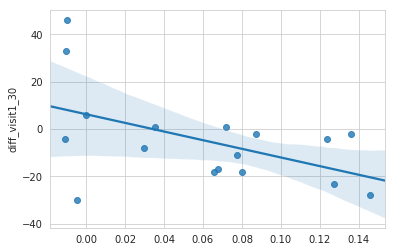

In [83]:
# So its Hippocampus Right (area 93 in Shens parcellation)
# Inf Temporal Gyrus left
# Dorsal ACC
# Lets plot
import seaborn as sns
sns.set_style("whitegrid") # change theme
ax = sns.regplot(x=globalGBC[:,92], y=PclDat_nonNa['diff_visit1_30'])
#ax.set(xlabel='Connectivity change (amg_hippo)', ylabel='GSR change (30d - before PE)')
plt.show()
#scipy.stats.pearsonr(gsrMerged['amg_hipp_R'], gsrMerged['three_one'])

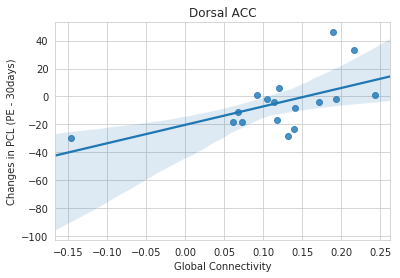

Correlation is: [-0.52871018  0.02910799]


In [84]:
ax = sns.regplot(x=globalGBC[:,193], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'Dorsal ACC')
plt.show()
print(f'Correlation is: {corArr[218,:]}')

In [86]:
# do it with second session
globalGBC_2 = np.load('/home/or/kpe_conn/ShenParc/totalGBC_2stTrauma.npy')

In [87]:
corArr_2 = []
for i in range(0,globalGBC_2.shape[1]):
    corMat = scipy.stats.pearsonr(globalGBC_2[:,i][mask], PclDat_nonNa['diff_visit1_30'][mask])
    corArr_2.append(corMat)
corArr_2 = np.array(corArr_2)
corArr_2[corArr_2[:,1] > 0.05] = 0 # zero everything that is higher than p=0.05
# get index of all that are none zero (i.e. lower than 0.05). To get the region label
np.nonzero(corArr_2[:,1])

(array([132]),)

Correlation is: [-0.52488505  0.03051339]


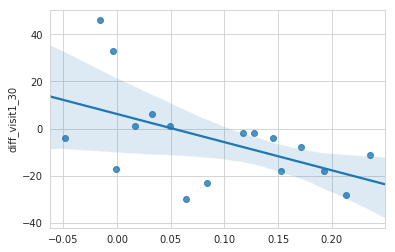

In [88]:
ax = sns.regplot(x=globalGBC_2[:,132], y=PclDat_nonNa['diff_visit1_30'])
print(f'Correlation is: {corArr_2[132,:]}')

In [91]:
# changes in Global brain connectivity
delTa1_2 = globalGBC_2 - globalGBC
delTa1_2.shape

(21, 268)

In [100]:
corArr_delta = []
for i in range(0,delTa1_2.shape[1]):
    corMat = scipy.stats.pearsonr(delTa1_2[:,i][mask], PclDat_nonNa['diff_visit1_30'][mask])
    corArr_delta.append(corMat)
corArr_delta = np.array(corArr_delta)
#corArr_delta[corArr_delta[:,1] > 0.05] = 0 # zero everything that is higher than p=0.05
# get index of all that are none zero (i.e. lower than 0.05). To get the region label
np.nonzero(corArr_delta[:,1])
corArr_delta[:,1]

array([0.10551904, 0.83855319, 0.03220961, 0.68320963, 0.03988846,
       0.10102337, 0.09807379, 0.35404182, 0.20735372, 0.02504461,
       0.12188708, 0.05484433, 0.01988463, 0.14569908, 0.29814902,
       0.74532202, 0.94544069, 0.76887131, 0.29669797, 0.48717312,
       0.54971046, 0.17668862, 0.71978209, 0.99210441, 0.84282154,
       0.31940235, 0.20513578, 0.70281869, 0.58664663, 0.50523416,
       0.47153096, 0.29481076, 0.30473134, 0.28700414, 0.95939782,
       0.31078118, 0.74235611, 0.29979309, 0.5602664 , 0.91025047,
       0.18102606, 0.08266596, 0.08501009, 0.69693466, 0.38028832,
       0.57204879, 0.36664569, 0.09382122, 0.65172612, 0.34718202,
       0.96058898, 0.78731578, 0.68616708, 0.92697306, 0.53763995,
       0.7641878 , 0.55037611, 0.75043611, 0.71617837, 0.31488614,
       0.74328275, 0.9025331 , 0.47336594, 0.84615723, 0.49090286,
       0.40266498, 0.92421072, 0.41952702, 0.99952141, 0.99622454,
       0.38247605, 0.71231539, 0.48620683, 0.56894402, 0.24827

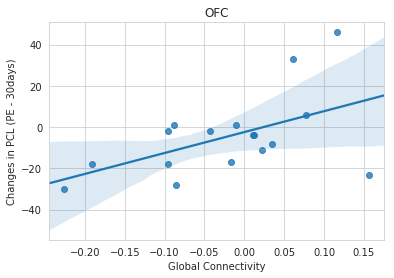

Correlation is: [0.52044457 0.03220961]


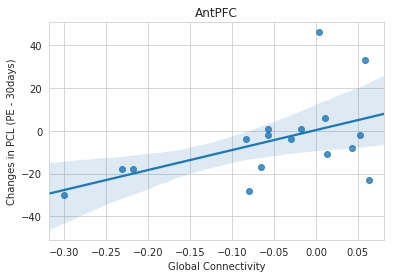

Correlation is: [0.50233003 0.03988846]


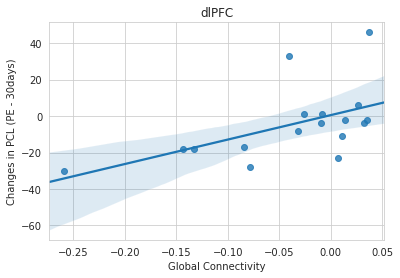

Correlation is: [0.54063472 0.02504461]


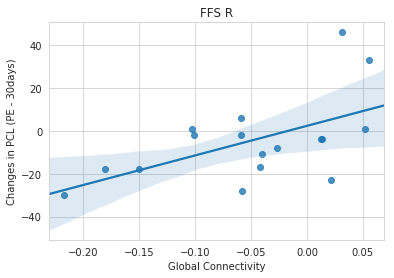

Correlation is: [0.5581655  0.01988463]


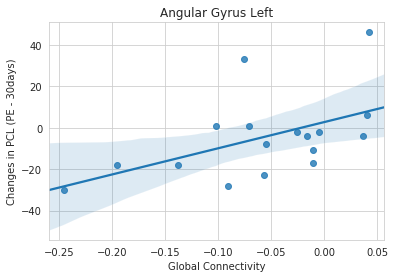

Correlation is: [0.51061462 0.03622107]


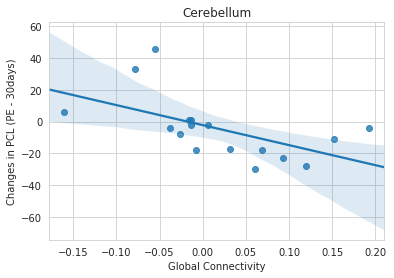

Correlation is: [-0.56218995  0.0188268 ]


In [96]:
# find 6 regions below 0.05
# Orbitofrontal Right
# Anterior Prefrontal (vmPFC?) - R
# dlPFC R
# FFS Right
# Angular Gyrus left
# Left Cerebellum (area 249 Shen Par)
ax = sns.regplot(x=delTa1_2[:,2], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'OFC')
plt.show()
print(f'Correlation is: {corArr_delta[2,:]}')

ax = sns.regplot(x=delTa1_2[:,4], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'AntPFC')
plt.show()
print(f'Correlation is: {corArr_delta[4,:]}')

ax = sns.regplot(x=delTa1_2[:,9], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'dlPFC')
plt.show()
print(f'Correlation is: {corArr_delta[9,:]}')

ax = sns.regplot(x=delTa1_2[:,12], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'FFS R')
plt.show()
print(f'Correlation is: {corArr_delta[12,:]}')

ax = sns.regplot(x=delTa1_2[:,181], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'Angular Gyrus Left')
plt.show()
print(f'Correlation is: {corArr_delta[181,:]}')

ax = sns.regplot(x=delTa1_2[:,248], y=PclDat_nonNa['diff_visit1_30'])
ax.set(xlabel='Global Connectivity', ylabel='Changes in PCL (PE - 30days)', title = 'Cerebellum')
plt.show()
print(f'Correlation is: {corArr_delta[248,:]}')

In [110]:
# now lets try FDR
from statsmodels.stats import multitest
# we need to reshape the test p-values array to create 1D array
#b = np.reshape(np.array(testDelta[1]), -1)
fdr_mat = multitest.multipletests(corArr_delta[:,1], alpha=0.05, method='fdr_bh', is_sorted=False, returnsorted=False)
#fdr_mat = multitest.fdrcorrection(testDelta[1], alpha=0.7, method='indep', is_sorted=False)

np.sum(fdr_mat[0])
# Nothing stands FDR correction

0